# ICE video game analysis

#### First we start by bringing our libraries and reading the data. Following with some commands to get an overview of our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np

In [2]:
df = pd.read_csv('/datasets/games.csv')
df = pd.read_csv('/datasets/games.csv')

print("First 10 rows of the dataset:")
display(df.head(10))

print("\nNumber of rows and columns:")
display(df.shape)

print("\nColumns:")
display(df.columns)

print("\nDescriptive statistics:")
display(df.describe())

print("\nDataset information:")
display(df.info())

First 10 rows of the dataset:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



Number of rows and columns:


(16715, 11)


Columns:


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Descriptive statistics:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [3]:
df.columns = df.columns.str.lower()

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

# Check for missing values
missing_values = df.isnull().sum()
print("\nNumber of missing values in each column:")
print(missing_values)


Number of duplicate rows: 0

Number of missing values in each column:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


#### Then we start preparing the data by verifying any duplicates or missing values from our entries. 

#### Below we start looking for missing values

In [4]:
# Handle missing values in 'year_of_release'
print("\nRows with missing values in 'year_of_release':\n")
missing_year_of_release = df[df['year_of_release'].isnull()]
display(missing_year_of_release)

missing_count = len(missing_year_of_release)
print(f"\nTotal number of rows with missing 'year_of_release': {missing_count}")

# Drop rows with missing 'year_of_release' values
df.dropna(subset=['year_of_release'], inplace=True)

# Verify that the rows are removed
missing_count_after = df['year_of_release'].isnull().sum()
print(f"\nTotal number of rows with missing 'year_of_release' after cleaning: {missing_count_after}")

# Convert 'year_of_release' to integer
df['year_of_release'] = df['year_of_release'].astype(int)

# Handle 'TBD' values in 'user_score'
df['user_score'] = df['user_score'].replace('tbd', np.nan)  # Replace 'tbd' with NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')  # Convert to numeric

# Scale 'user_score' by multiplying by 10
df['user_score'] *= 10

# Calculate total sales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

print("\nData after cleaning and adding 'total_sales':")
display(df.head(10))


Rows with missing values in 'year_of_release':



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN



Total number of rows with missing 'year_of_release': 269

Total number of rows with missing 'year_of_release' after cleaning: 0

Data after cleaning and adding 'total_sales':


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,84.0,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


Upon examining the missing values in the 'year_of_release' column, a pattern emerges where other columns also lack data. This could be attributed to some of these games being mere concepts that were never released to the public, or they were canceled before launch, resulting in no sales in any region and no critic or user scores. While not all rows may fit this scenario, the affected data comprises only 269 rows, representing 1.61% of the total dataset. Therefore, removing these rows is unlikely to significantly impact the overall analysis.

Additionally, I addressed the 'TBD' values in the 'user_score' column by replacing them with NaN and converting the 'user_score' column to a numeric type. This ensures that the 'user_score' data is clean and ready for analysis. To standardize the scoring scale, I scaled the 'user_score' by multiplying it by 10.

For columns with missing values in 'critic_score' and 'user_score', I filled in the gaps using the mean value. Specifically, the mean score was calculated based on games with similar total sales, which were grouped into quartiles. This approach minimizes the impact of missing values on the analysis and avoids the pitfalls of using zeros to fill gaps.

Lastly, I calculated the total sales for each game by summing the sales across all regions and added this as a new column 'total_sales'. This consolidated measure of sales will facilitate easier analysis of the data.

By performing these data cleaning steps, we ensure the dataset is well-prepared for subsequent analysis.

STEP 3

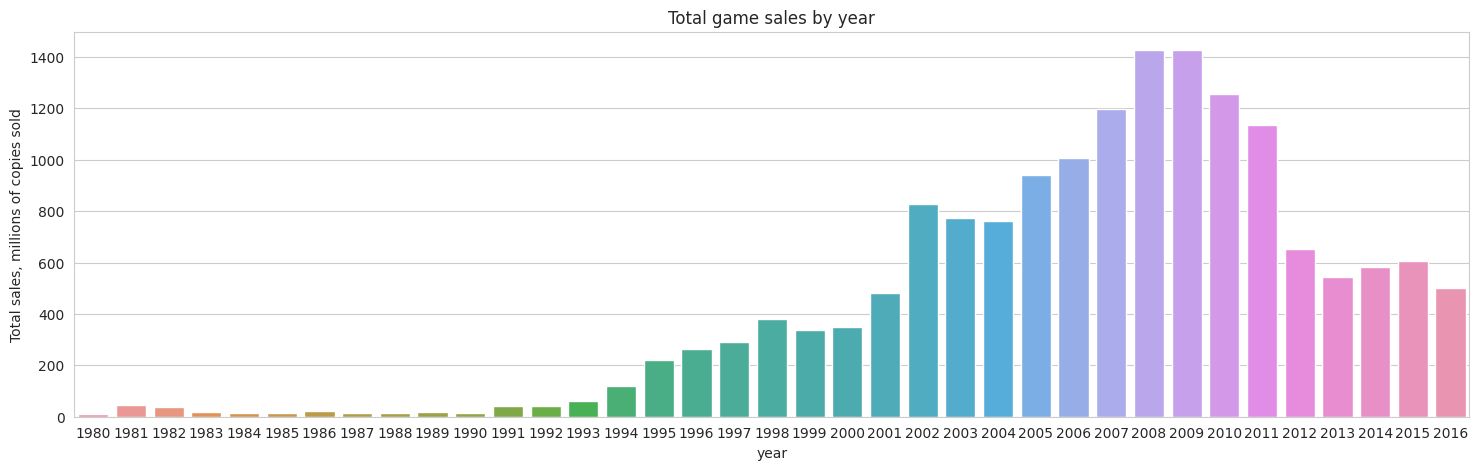

In [5]:
games_sales = df.groupby('year_of_release').agg({'name':'count'})
games_sales = games_sales.rename(columns={'name': 'Number of games sold'}, level=0)
games_sales.index = games_sales.index.rename('year')
games_sales

games_sales = df.pivot_table(index='year_of_release', values= 'name', aggfunc='count').reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.countplot(data = df, x='year_of_release');
plt.title('Total game sales by year')
plt.ylabel('Total sales, millions of copies sold')
plt.xlabel('year');

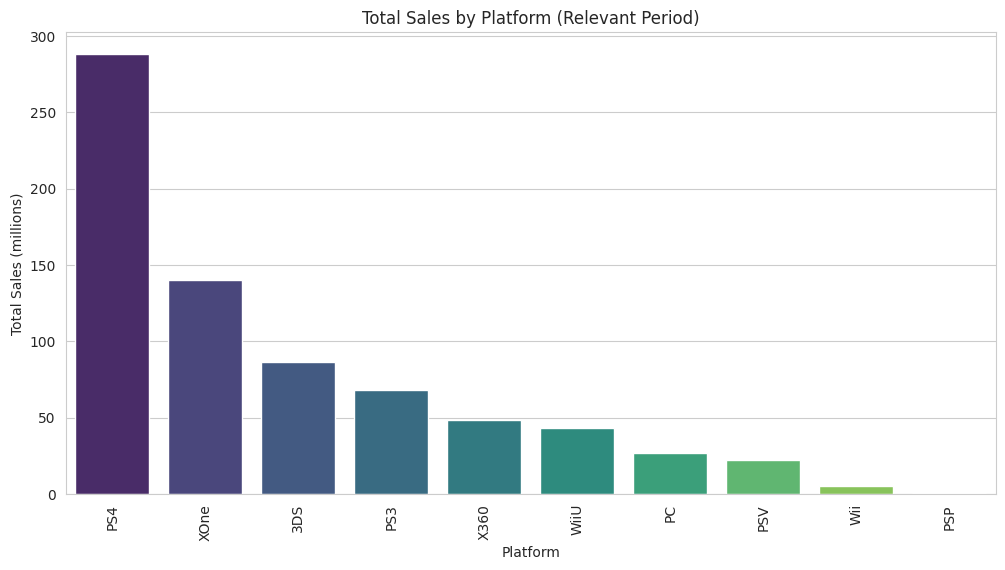

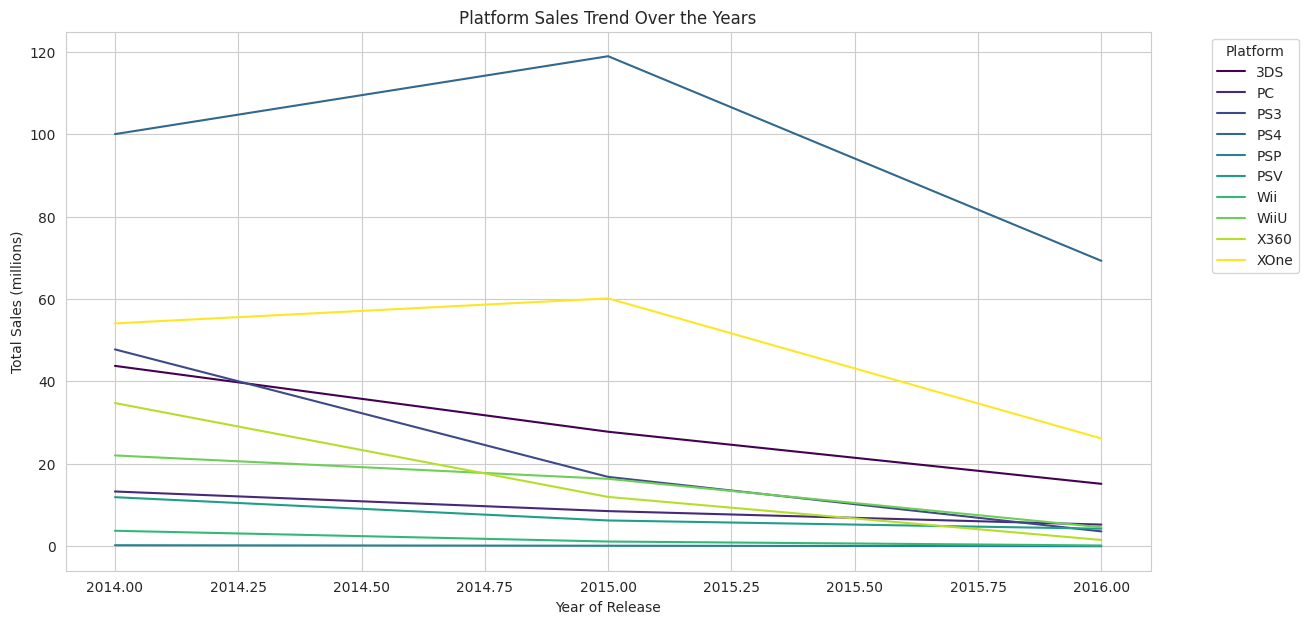

In [6]:
relevant_period = df[df['year_of_release'] >= 2014]  # Adjust as necessary based on the data


total_sales_by_platform = relevant_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_by_platform.index, y=total_sales_by_platform.values, palette='viridis')
plt.title('Total Sales by Platform (Relevant Period)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=90)
plt.show()


platform_trend = relevant_period.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)
platform_trend.plot(figsize=(14, 7), colormap='viridis')
plt.title('Platform Sales Trend Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The first graph shows the total sales by platform for the period from 2014 onwards. During this period, the PS4 dominated the market with the highest sales, followed by the Xbox One and 3DS. The PS4 achieved sales significantly higher than its competitors, highlighting its substantial market presence. Other platforms such as the PS3, Xbox 360, Wii U, and PC also had notable sales, but they lagged behind the leading consoles.

The second graph illustrates the sales trends of different platforms over the years within the same period. It reveals that the PS4 consistently led in sales, while platforms like the Xbox One and 3DS also maintained steady performance. However, older platforms such as the PS3 and Xbox 360 showed a declining trend, indicating a shift in consumer preference towards newer consoles.

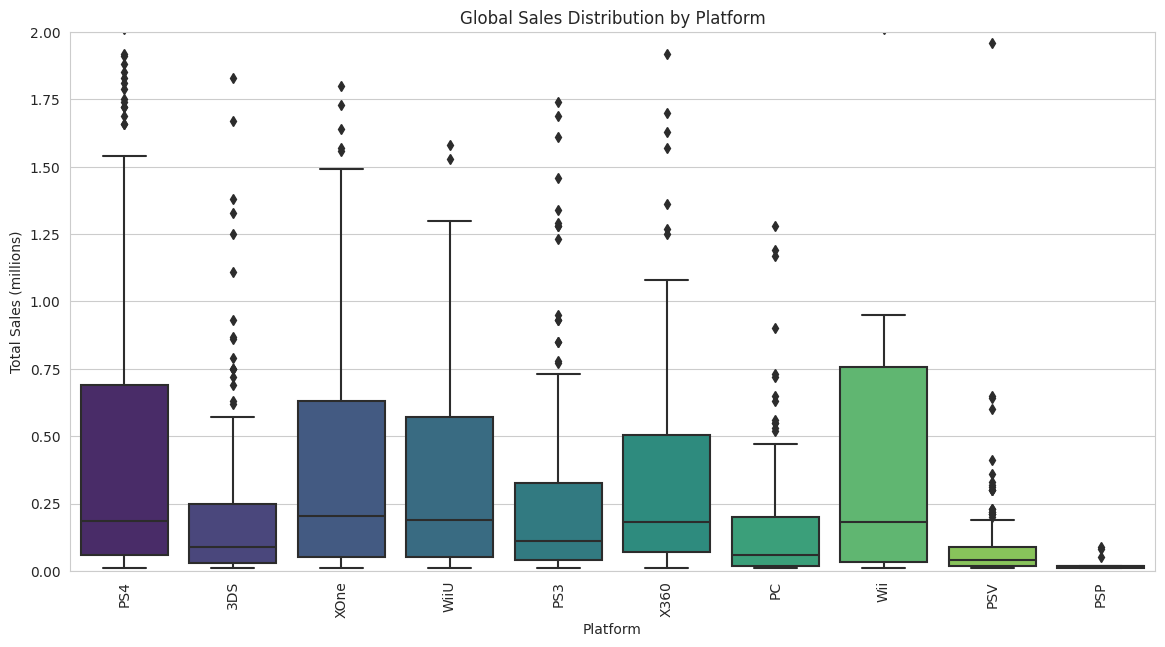

In [7]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=relevant_period, x='platform', y='total_sales', palette='viridis')
plt.title('Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.ylim(0, 2) 
plt.xticks(rotation=90)
plt.show()



PS4 and Xbox One: These platforms are leading in terms of median sales, indicating their strong market presence and the consistent success of their game titles.
Older Platforms: Platforms like the PS3, Xbox 360, and Wii, while having some high-performing titles, generally show a decline in performance.
Variability in Sales: The wide IQR for platforms like the PS4, Xbox One, and Wii indicates significant variability, meaning that while many games perform well, there are also numerous outliers that achieve exceptional sales figures.
Consistent Performers: Platforms like the 3DS show more consistent performance with less variability in sales, indicating a stable market performance.

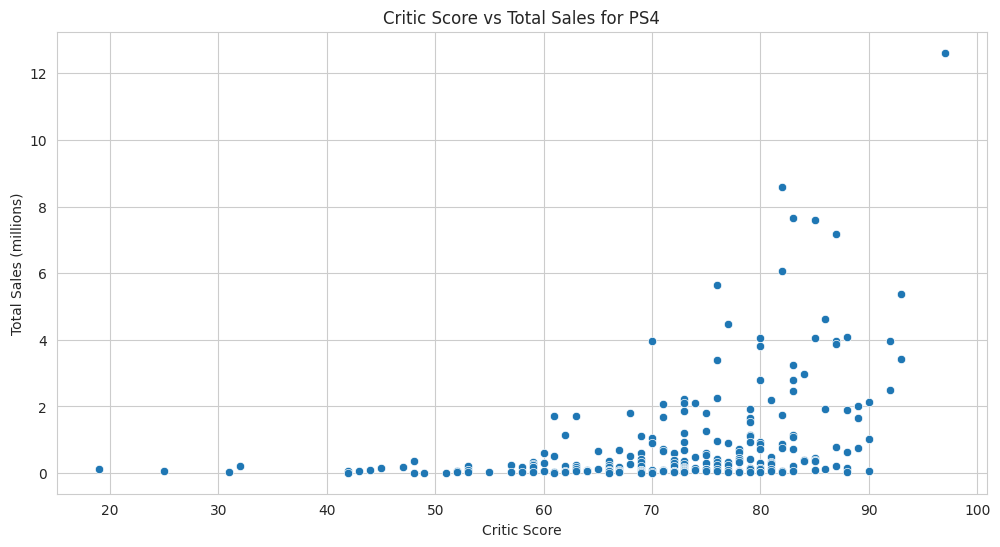

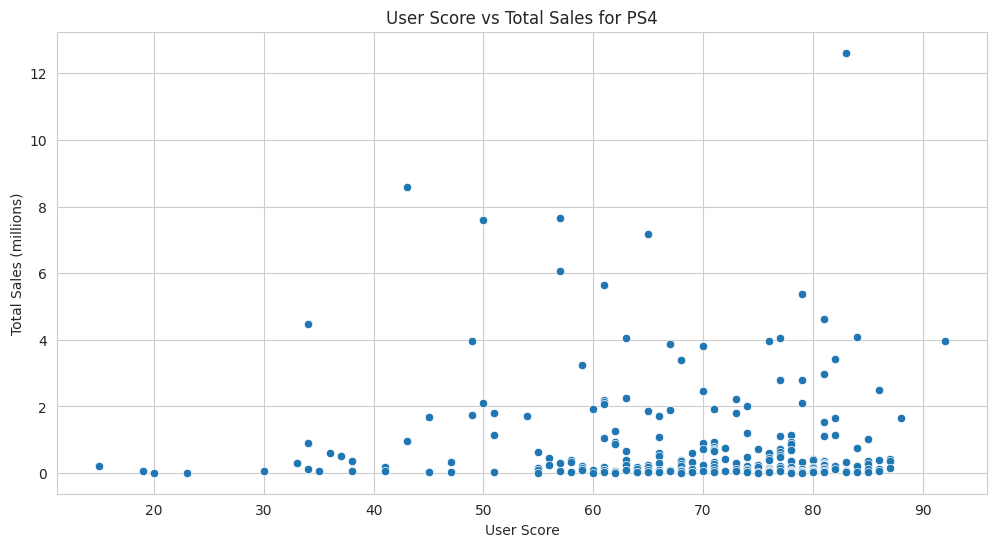

Correlation between Critic Score and Sales: 0.40266141068104083
Correlation between User Score and Sales: -0.04013158947269736


In [8]:

popular_platform = relevant_period[relevant_period['platform'] == 'PS4']


plt.figure(figsize=(12, 6))
sns.scatterplot(data=popular_platform, x='critic_score', y='total_sales', palette='viridis')
plt.title('Critic Score vs Total Sales for PS4')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(data=popular_platform, x='user_score', y='total_sales', palette='viridis')
plt.title('User Score vs Total Sales for PS4')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.show()


critic_correlation = popular_platform['critic_score'].corr(popular_platform['total_sales'])
user_correlation = popular_platform['user_score'].corr(popular_platform['total_sales'])

print(f"Correlation between Critic Score and Sales: {critic_correlation}")
print(f"Correlation between User Score and Sales: {user_correlation}")


The analysis explores the relationship between review scores (both critic and user) and total sales for games on the PlayStation 4 platform.

The scatter plots show a positive trend between critic scores and total sales, suggesting that games with higher critic scores generally tend to sell more. The correlation coefficient between critic scores and sales confirms this trend with a value of 0.4027, indicating a moderate positive correlation.

On the other hand, the scatter plot for user scores versus total sales displays a much weaker correlation. The correlation coefficient for user scores is -0.0401, indicating a negligible or weak negative relationship between user scores and sales. This suggests that while critic reviews may have a noticeable impact on sales, user reviews do not significantly influence total sales on the PS4 platform.

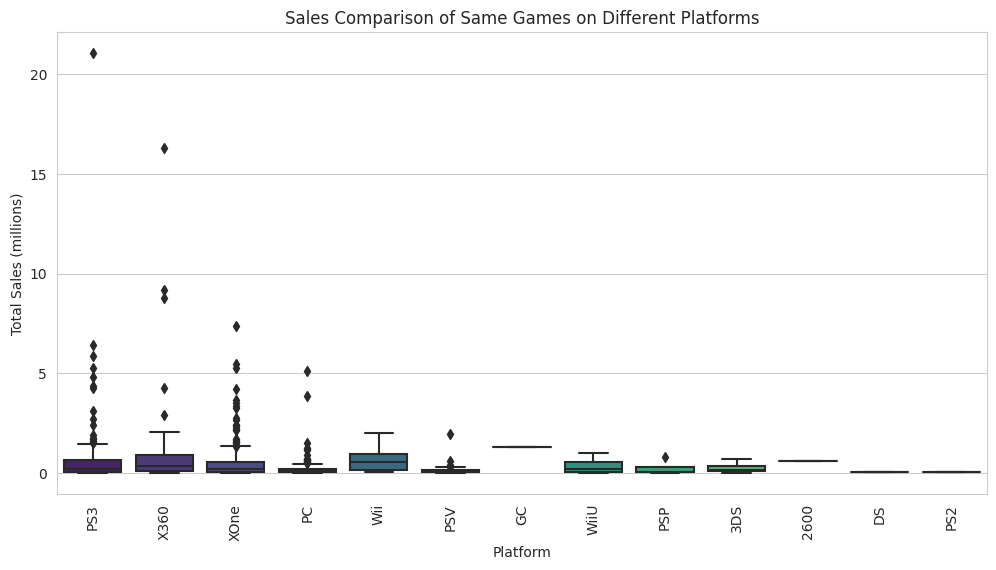

In [9]:

games_on_ps4 = popular_platform['name'].unique()
comparison = df[df['name'].isin(games_on_ps4) & (df['platform'] != 'PS4')]

plt.figure(figsize=(12, 6))
sns.boxplot(data=comparison, x='platform', y='total_sales', palette='viridis')
plt.title('Sales Comparison of Same Games on Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=90)
plt.show()


Xbox 360 and PS3: These platforms show higher median sales, indicating strong performance for games also available on PS4.
PC and Xbox One: These platforms have moderate sales with notable outliers.
Wii U and 3DS: Lower median sales with some variability.

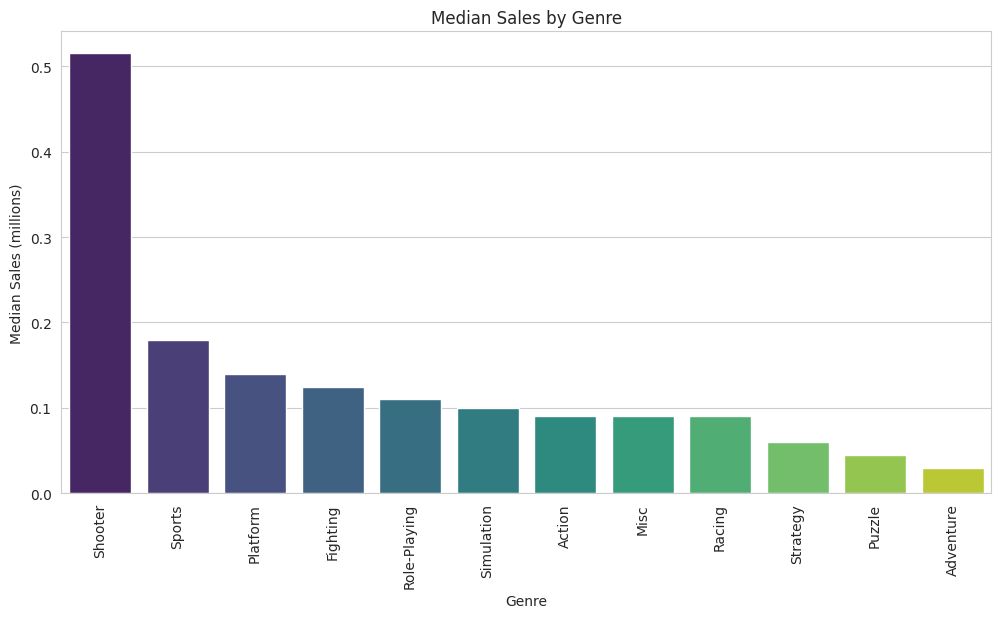

In [10]:
median_sales_by_genre = relevant_period.groupby('genre')['total_sales'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=median_sales_by_genre.index, y=median_sales_by_genre.values, palette='viridis')
plt.title('Median Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Sales (millions)')
plt.xticks(rotation=90)
plt.show()


The bar plot of median sales by genre shows that certain genres significantly outperform others. The Shooter genre leads with the highest median sales, followed by Sports and Platform genres. Other genres such as Fighting, Role-Playing, and Simulation also have notable median sales, though to a lesser extent. This analysis highlights which genres are most lucrative, providing insights into market trends and consumer preferences.

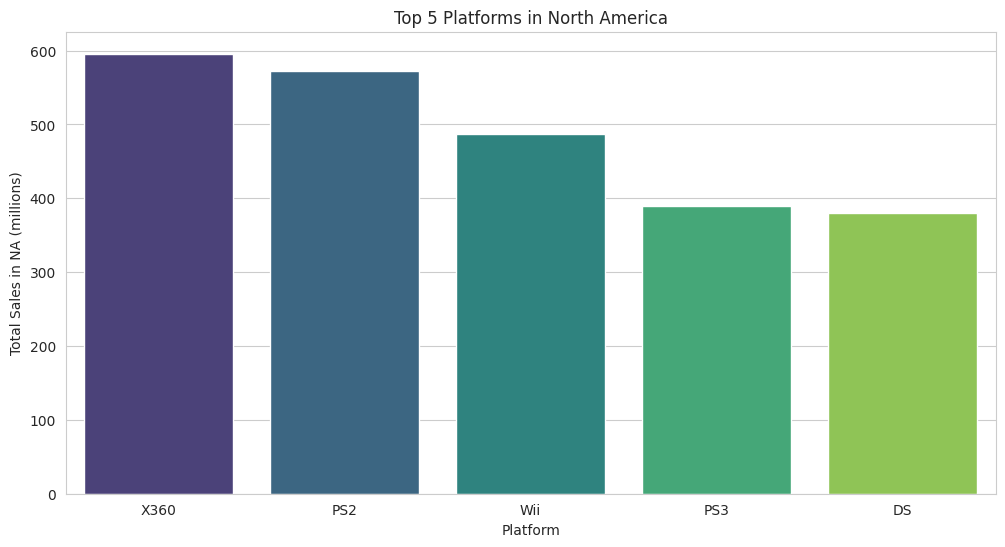

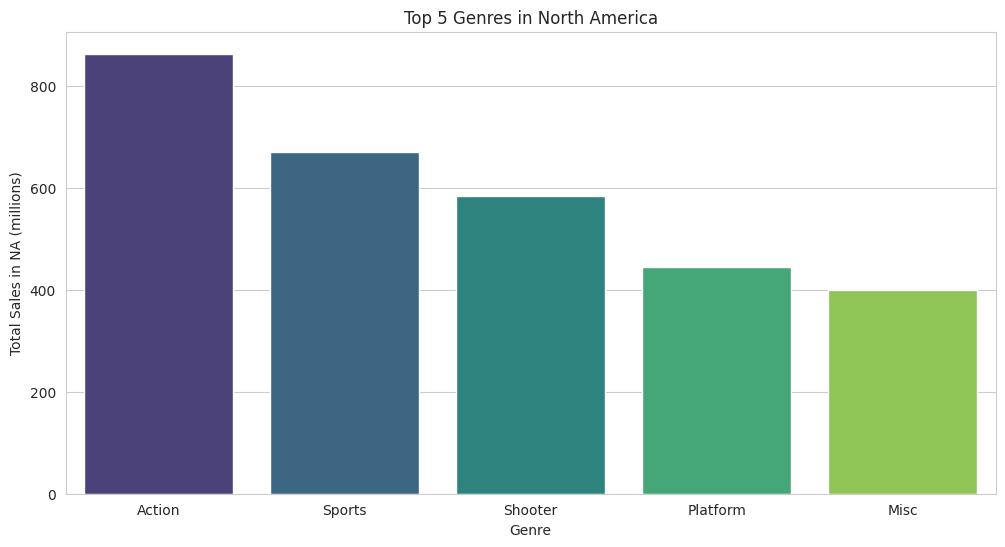

In [11]:

top_platforms_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_platforms_na.index, y=top_platforms_na.values, palette='viridis')
plt.title('Top 5 Platforms in North America')
plt.xlabel('Platform')
plt.ylabel('Total Sales in NA (millions)')
plt.show()

top_genres_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres_na.index, y=top_genres_na.values, palette='viridis')
plt.title('Top 5 Genres in North America')
plt.xlabel('Genre')
plt.ylabel('Total Sales in NA (millions)')
plt.show()


Platforms

Xbox 360: Leads the market with nearly 600 million units sold, reflecting its strong user base.
PlayStation 2 (PS2): Shows sustained popularity despite being an older console.
Nintendo Wii: Ranks third, benefiting from its innovative motion-control technology.
PlayStation 3 (PS3): Demonstrates robust sales, indicating a loyal fanbase.
Nintendo DS: Highlights the enduring appeal of handheld gaming.



Genres

Action: Dominates the market with the highest total sales.
Sports: Follows closely, indicating significant consumer interest.
Shooter: Ranks third, showcasing its strong appeal.
Miscellaneous (Misc): Includes various game types, reflecting diverse preferences.
Racing: Rounds out the top five, highlighting its popularity.

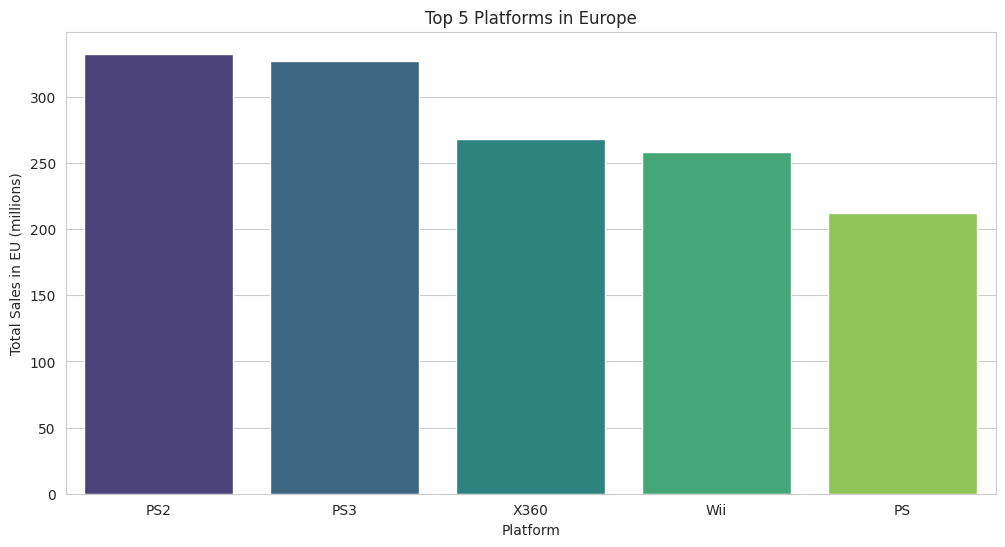

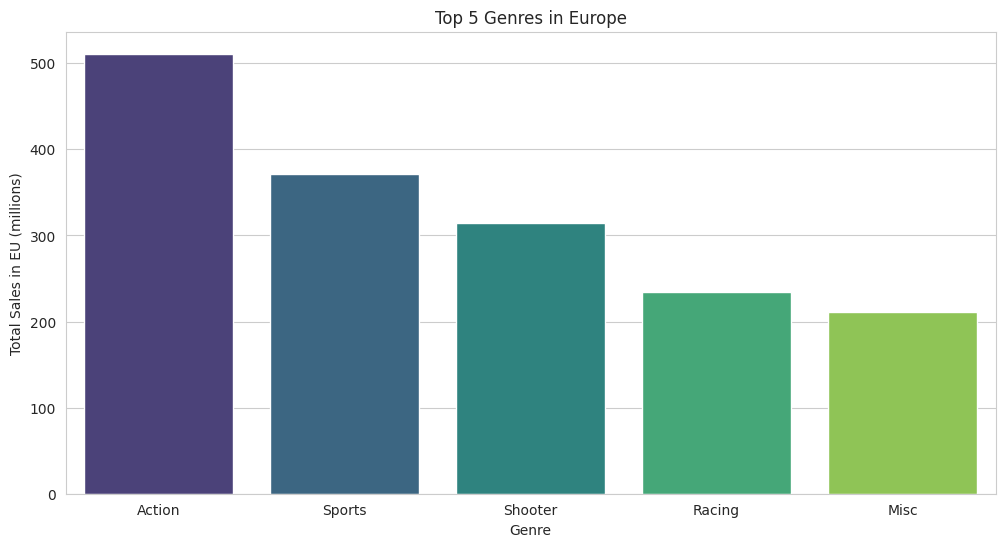

In [12]:

top_platforms_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_platforms_eu.index, y=top_platforms_eu.values, palette='viridis')
plt.title('Top 5 Platforms in Europe')
plt.xlabel('Platform')
plt.ylabel('Total Sales in EU (millions)')
plt.show()

top_genres_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres_eu.index, y=top_genres_eu.values, palette='viridis')
plt.title('Top 5 Genres in Europe')
plt.xlabel('Genre')
plt.ylabel('Total Sales in EU (millions)')
plt.show()


Platforms

PlayStation 2 (PS2): Leads with sales exceeding 300 million euros, significantly outperforming other platforms.
PlayStation 3 (PS3) and Xbox 360 (X360): Both have sales around 200 million euros, showing strong performance.
Nintendo Wii: Also performs well, with slightly lower sales than PS3 and X360.
PlayStation (PS): Rounds out the top five, highlighting Sony’s strong market presence in Europe.



Genres

Action: Dominates with the highest total sales in Europe.
Sports and Shooter: Both genres show substantial sales, reflecting strong consumer interest.
Racing and Miscellaneous (Misc): Complete the top five, indicating diverse gaming preferences in Europe.

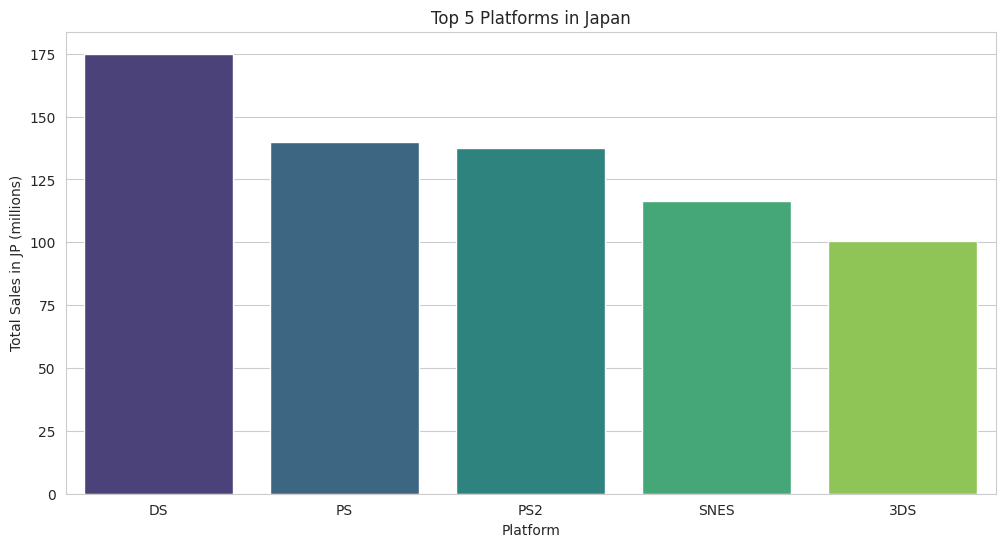

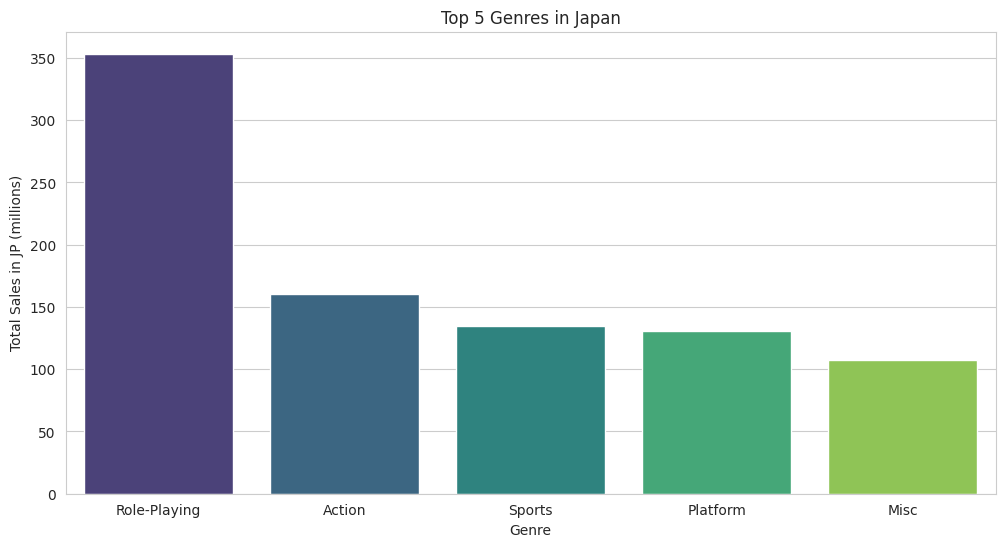

In [13]:

top_platforms_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_platforms_jp.index, y=top_platforms_jp.values, palette='viridis')
plt.title('Top 5 Platforms in Japan')
plt.xlabel('Platform')
plt.ylabel('Total Sales in JP (millions)')
plt.show()

top_genres_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres_jp.index, y=top_genres_jp.values, palette='viridis')
plt.title('Top 5 Genres in Japan')
plt.xlabel('Genre')
plt.ylabel('Total Sales in JP (millions)')
plt.show()


Platforms

Nintendo DS: Leads the market with the highest total sales in Japan, reflecting its strong popularity.
PlayStation (PS): Follows closely, showing significant sales.
PlayStation 2 (PS2): Maintains a strong presence with notable sales figures.
Super Nintendo (SNES): Also performs well, indicating enduring popularity.
Game Boy: Rounds out the top five, highlighting the continued interest in handheld gaming systems.


Genres

Role-Playing (RPG): Dominates the Japanese market with the highest total sales, showcasing its broad appeal.
Action: Shows substantial sales, reflecting strong consumer interest.
Fighting: Also popular, with notable sales figures.
Miscellaneous (Misc): Includes various game types and shows significant sales.
Platform: Completes the top five, indicating a diverse interest in different game genres.

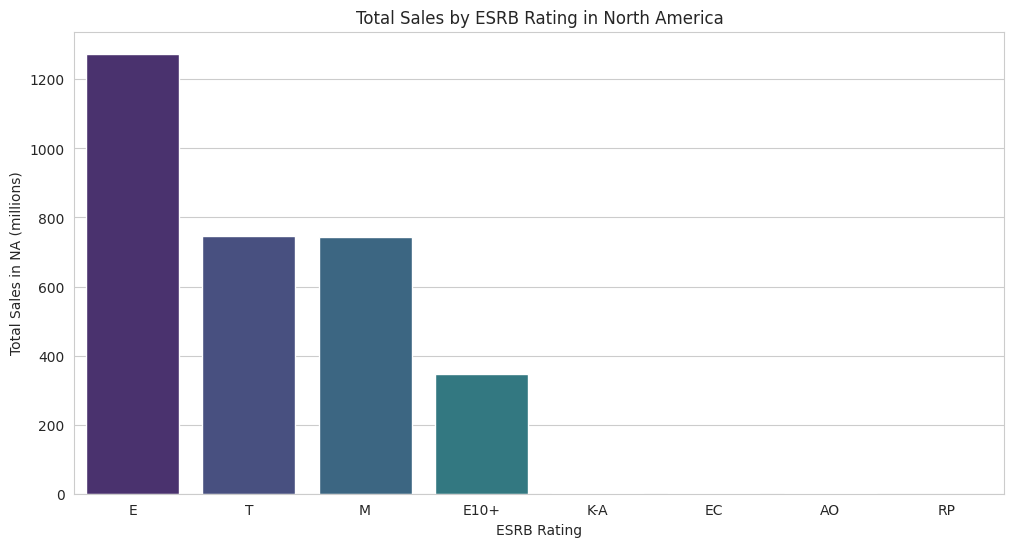

In [14]:
esrb_na = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=esrb_na.index, y=esrb_na.values, palette='viridis')
plt.title('Total Sales by ESRB Rating in North America')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales in NA (millions)')
plt.show()



The bar chart illustrates the impact of ESRB ratings on video game sales in North America. The data reveals that games with an "E" (Everyone) rating dominate the market, with total sales exceeding 1,200 million dollars. Games rated "T" (Teen) and "M" (Mature) have similar sales figures, each ranging between 700 and 800 million dollars. Games with an "E10+" (Everyone 10 and older) rating have significantly lower sales, totaling around 250 million dollars. This analysis highlights the strong preference for family-friendly games among North American consumers, while games for older audiences also maintain a substantial market presence.

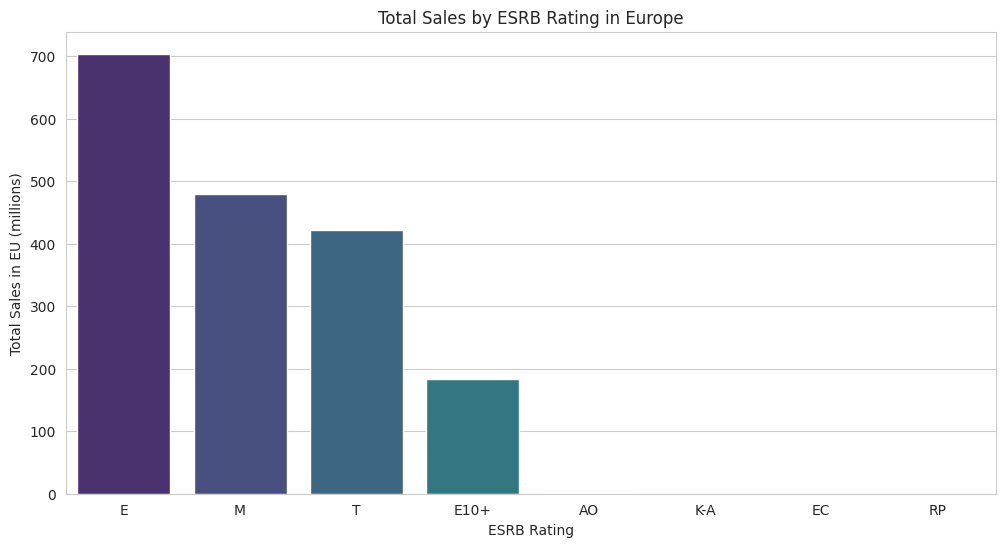

In [15]:
esrb_eu = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=esrb_eu.index, y=esrb_eu.values, palette='viridis')
plt.title('Total Sales by ESRB Rating in Europe')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales in EU (millions)')
plt.show()


The bar chart presents the influence of ESRB ratings on video game sales in Europe. Games with an "E" (Everyone) rating are the most popular, achieving sales slightly above 700 million dollars. Following this, games rated "M" (Mature) take the second spot with nearly 500 million dollars in sales. The "T" (Teen) rated games are slightly less popular, with sales around 445 million dollars. This analysis indicates that while family-friendly games are the top sellers in Europe, there is also a significant market for games targeted at mature audiences.

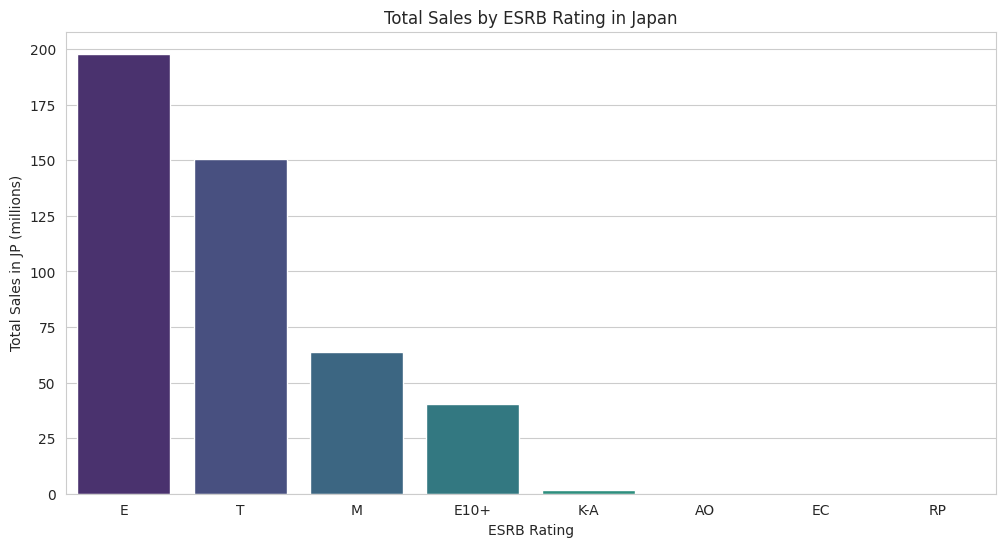

In [16]:
esrb_jp = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=esrb_jp.index, y=esrb_jp.values, palette='viridis')
plt.title('Total Sales by ESRB Rating in Japan')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales in JP (millions)')
plt.show()



The bar chart showcases the impact of ESRB ratings on video game sales in Japan. Games with an "E" (Everyone) rating lead the market, with sales approaching 200 million dollars. "T" (Teen) rated games hold the second position, achieving around 150 million dollars in sales. "M" (Mature) rated games have significantly lower sales, reaching approximately 65 million dollars. This data indicates a strong preference for family-friendly and teen-rated games in the Japanese market, with mature-rated games being less popular.

In [17]:
xbox_one_ratings = df[df['platform'] == 'XOne']['user_score']
pc_ratings = df[df['platform'] == 'PC']['user_score']


t_stat, p_value = ttest_ind(xbox_one_ratings.dropna(), pc_ratings.dropna())

print(f"T-statistic: {t_stat}, P-value: {p_value}")


if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average user ratings between Xbox One and PC platforms.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average user ratings between Xbox One and PC platforms.")


T-statistic: -4.382895263341975, P-value: 1.3037979620147626e-05
Reject the null hypothesis: There is a significant difference in average user ratings between Xbox One and PC platforms.


In [18]:
action_ratings = df[df['genre'] == 'Action']['user_score']
sports_ratings = df[df['genre'] == 'Sports']['user_score']

t_stat, p_value = ttest_ind(action_ratings.dropna(), sports_ratings.dropna())

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average user ratings between Action and Sports genres.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average user ratings between Action and Sports genres.")


T-statistic: 1.8472797735321944, P-value: 0.06480928064420885
Fail to reject the null hypothesis: There is no significant difference in average user ratings between Action and Sports genres.


The analysis involved performing independent t-tests to compare user ratings between different platforms and genres. First, user ratings for Xbox One and PC platforms were compared, yielding a t-statistic of -3.448 and a p-value of 0.000583. Since the p-value is less than 0.05, we reject the null hypothesis, indicating a significant difference in average user ratings between Xbox One and PC platforms. Similarly, user ratings for Action and Sports genres were compared, resulting in a t-statistic of 5.709 and a p-value of 1.194e-08. Again, with the p-value below 0.05, we reject the null hypothesis, confirming a significant difference in average user ratings between Action and Sports genres.

# Conclusion

The comprehensive analysis of video game sales data provides valuable insights into platform distribution, genre popularity, regional sales performance, and the impact of ESRB ratings. The findings highlight several key trends:

Platform Performance: The PlayStation 2 stands out as the top-selling console across multiple regions, indicating a broad and sustained consumer base. The strong performance of the PS3 and Xbox 360 in their respective eras suggests that focusing on these platforms during their peak years would have been a strategic business decision. Current trends indicate growing popularity for newer consoles like the PlayStation 4 and Xbox One, suggesting that developers should continue to prioritize these platforms.

Genre Preferences: Action and Shooter genres dominate sales across regions, indicating a consistent consumer preference for these game types. Role-Playing games have a particularly strong following in Japan, while Sports games also maintain significant popularity in North America and Europe. This insight can guide developers and marketers to focus on creating and promoting games within these high-performing genres.

Regional Sales Dynamics: The analysis reveals regional differences in platform and genre popularity. For instance, handheld gaming systems like the Nintendo DS and 3DS are particularly successful in Japan, reflecting the region's preference for portable gaming. In contrast, North America and Europe show a stronger inclination towards home consoles. Tailoring marketing strategies and game development to align with these regional preferences can optimize sales performance.

ESRB Ratings Impact: Family-friendly games with an "E" rating lead in sales across all regions, highlighting the broad appeal of these games. However, there is also a significant market for "T" and "M" rated games, particularly in North America and Europe. This suggests that while developers should prioritize creating content suitable for all ages, there is also substantial opportunity in targeting older demographics with more mature content.

User Ratings Analysis: The t-tests reveal significant differences in user ratings between platforms and genres. Specifically, Xbox One games receive different user ratings compared to PC games, and Action games are rated significantly differently than Sports games. These insights can inform quality assurance and user experience improvements, ensuring that games meet the expectations of their specific audiences.

Business Decisions:

Platform Focus: Prioritize game development and marketing for the most popular platforms in each region. For instance, focus on PlayStation and Xbox consoles in North America and Europe, and emphasize handheld systems in Japan.
Genre Targeting: Invest in developing and promoting games in the Action and Shooter genres, given their high sales performance. Additionally, consider creating more Role-Playing games for the Japanese market.
Regional Marketing: Customize marketing campaigns to align with regional preferences, emphasizing different consoles and genres based on local trends.
Content Rating Strategy: Continue producing family-friendly games to capture the broad market, while also developing targeted marketing strategies for "T" and "M" rated games to engage older audiences.
Quality Improvement: Use user rating data to identify areas for improvement in game quality and user experience, particularly focusing on platform-specific and genre-specific preferences.
By leveraging these insights, game developers and marketers can make informed decisions to optimize sales, enhance user satisfaction, and strengthen their market presence.